In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("F:/code film/MachinLearn_NeuralNetwork/nuralnetwork/balanced_dataset_covid.csv")

disease_columns = ['diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
                   'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'pregnancy', 'pneumonia', 'intubed', 'icu',
                   'contact_other_covid', 'sex', 'patient_type', 'covid_res']

# Replace values in disease-related columns
for col in disease_columns:
    data[col].replace(to_replace=2, value=0, inplace=True)
    data[col].replace(to_replace=97, value=1, inplace=True)

data["date_died"].replace(to_replace="9999-99-99", value=0, inplace=True)
data["contact_other_covid"].replace(to_replace=99, value=1, inplace=True)
data["covid_res"].replace(to_replace=3, value=0, inplace=True)

data.drop(['age', 'sex', 'date_symptoms', 'entry_date', 'patient_type', 'contact_other_covid'], axis=1, inplace=True)
data.fillna(0, inplace=True)

# Split dataset into train and test sets
data_train = data.sample(frac=0.4, random_state=42)
data_test = data.drop(data_train.index)

x_train = data_train[['icu', 'diabetes', 'copd', 'asthma', 
                      'inmsupr', 'hypertension', 'cardiovascular', 'obesity', 
                      'renal_chronic', 'tobacco', 'pregnancy', 'pneumonia']].values
y_train = data_train[['covid_res']].values.flatten()
x_test = data_test[['icu', 'diabetes', 'copd', 'asthma', 
                    'inmsupr', 'hypertension', 'cardiovascular', 'obesity', 
                    'renal_chronic', 'tobacco', 'pregnancy', 'pneumonia']].values
y_test = data_test[['covid_res']].values.flatten()


C:\Users\sa\AppData\Local\Temp\ipykernel_9472\45246074.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(to_replace=2, value=0, inplace=True)
C:\Users\sa\AppData\Local\Temp\ipykernel_9472\45246074.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [4]:
def compute_cost_with_regularization(W, b, x, y, lambd):
    m = len(x)
    j = 0
    for i in range(m):
        z = np.dot(x[i], W) + b
        g = sigmoid(z)
        loss = -y[i] * np.log(g) - (1 - y[i]) * np.log(1 - g)
        j += loss
    regularization_term = (lambd / (2 * m)) * np.sum(W ** 2)
    return (j / m) + regularization_term


In [5]:
def compute_gradient_with_regularization(W, b, x, y, lambd):
    m = len(x)
    n = len(W)
    D_w = np.zeros_like(W)
    d_b = 0
    for i in range(m):
        z = np.dot(x[i], W) + b
        g = sigmoid(z)
        error = g - y[i]
        D_w += x[i] * error
        d_b += error
    D_w = (D_w / m) + (lambd / m) * W
    d_b = d_b / m
    return D_w, d_b

In [6]:
def gradient_descent_with_regularization(W_0, b_0, x, y, num_iter, alpha, lambd):
    cost_history = []
    W = W_0
    b = b_0
    for i in range(num_iter):
        D_w, d_b = compute_gradient_with_regularization(W, b, x, y, lambd)
        W -= alpha * D_w
        b -= alpha * d_b
        cost = compute_cost_with_regularization(W, b, x, y, lambd)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")
    return W, b, cost_history

In [7]:
def predict_func(W, b, x):
    m = len(x)
    prediction = np.zeros(m)
    for i in range(m):
        z = np.dot(x[i], W) + b
        g = sigmoid(z)
        prediction[i] = 1 if g >= 0.5 else 0
    return prediction


In [8]:
def compute_accuracy(prediction, y):
    return np.mean(prediction == y)


Iteration 0: Cost 0.6988027615024569


C:\Users\sa\AppData\Local\Temp\ipykernel_9472\4010101382.py:7: RuntimeWarning: divide by zero encountered in log
  loss = -y[i] * np.log(g) - (1 - y[i]) * np.log(1 - g)
C:\Users\sa\AppData\Local\Temp\ipykernel_9472\4010101382.py:7: RuntimeWarning: invalid value encountered in scalar multiply
  loss = -y[i] * np.log(g) - (1 - y[i]) * np.log(1 - g)


Iteration 100: Cost nan
Iteration 200: Cost nan
Iteration 300: Cost nan
Iteration 400: Cost nan
Iteration 500: Cost nan
Iteration 600: Cost nan
Iteration 700: Cost nan
Iteration 800: Cost nan
Iteration 900: Cost nan


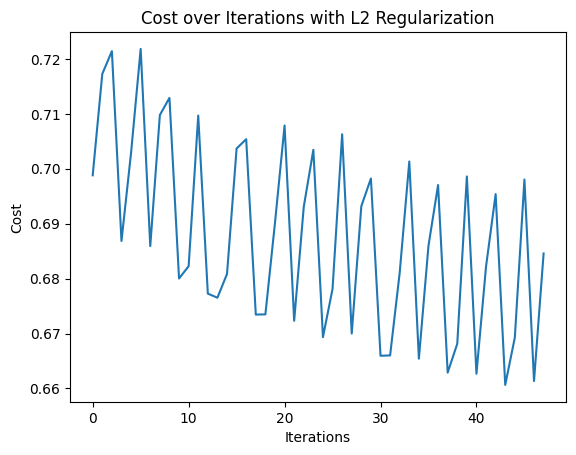

Model Accuracy with Regularization: 0.6525765359010389


In [9]:
W_0 = np.zeros(x_train.shape[1])
b_0 = 0
alpha = 0.1
num_iter = 1000
lambd = 0.1  

# Train the model with regularization
W_opt, b_opt, cost_history = gradient_descent_with_regularization(W_0, b_0, x_train, y_train, num_iter, alpha, lambd)


plt.plot(range(num_iter), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations with L2 Regularization')
plt.show()


predictions = predict_func(W_opt, b_opt, x_test)
accuracy = compute_accuracy(predictions, y_test)
print(f"Model Accuracy with Regularization: {accuracy}")
